In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

%config InlineBackend.figure_format = 'retina'

In [2]:
file_name = glob("data/weather.csv")
file_name

df = pd.read_csv(file_name[0], encoding='cp949')
df.head(5)

/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_77821/680945572.py:4: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name[0], encoding='cp949')


,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,90,속초,2015-01-01,-4.6,-7.9,757.0,-1.8,1156.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2015-01-02,-2.9,-5.4,2258.0,0.9,1430.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2015-01-03,1.1,-7.2,153.0,6.9,1331.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2015-01-04,5.8,1.9,2342.0,10.4,1335.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2015-01-05,7.3,2.2,212.0,12.2,1716.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(269844, 62)

In [3]:
df = df.drop(columns=[
                        '지점','최저기온 시각(hhmi)','최고기온 시각(hhmi)','강수 계속시간(hr)','10분 최다 강수량(mm)','10분 최다강수량 시각(hhmi)',
                        '1시간 최다강수량(mm)','1시간 최다 강수량 시각(hhmi)','최대 순간 풍속(m/s)','최대 순간 풍속 풍향(16방위)',
                        '최대 순간풍속 시각(hhmi)', '최대 풍속 풍향(16방위)','최대 풍속 시각(hhmi)',
                        '풍정합(100m)','평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)','최고 해면기압(hPa)', 
                        '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
                        '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
                        '일 최심신적설 시각(hhmi)','일 최심적설 시각(hhmi)','합계 3시간 신적설(cm)','최저 초상온도(°C)','평균 5cm 지중온도(°C)','평균 10cm 지중온도(°C)',
                        '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)','0.5m 지중온도(°C)','1.0m 지중온도(°C)', '1.5m 지중온도(°C)', 
                        '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)','합계 소형증발량(mm)', '9-9강수(mm)', '기사', '안개 계속시간(hr)'
                    ])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   지점명             269844 non-null  object 
 1   일시              269844 non-null  object 
 2   평균기온(°C)        269510 non-null  float64
 3   최저기온(°C)        269780 non-null  float64
 4   최고기온(°C)        269782 non-null  float64
 5   일강수량(mm)        100439 non-null  float64
 6   최대 풍속(m/s)      269620 non-null  float64
 7   평균 풍속(m/s)      269547 non-null  float64
 8   최다풍향(16방위)      268835 non-null  float64
 9   평균 상대습도(%)      269354 non-null  float64
 10  평균 증기압(hPa)     269346 non-null  float64
 11  평균 현지기압(hPa)    269472 non-null  float64
 12  일 최심신적설(cm)     1601 non-null    float64
 13  일 최심적설(cm)      2314 non-null    float64
 14  평균 전운량(1/10)    176363 non-null  float64
 15  평균 중하층운량(1/10)  168588 non-null  float64
 16  평균 지면온도(°C)     269691 non-null  float64
dtypes: float64

In [5]:
for col in df.columns:
    print(df[col].dtypes.name)
    dtype_name = df[col].dtypes.name
    if dtype_name.startswith("int"):
        if df[col].min() >= 0:
            df[col] = pd.to_numeric(df[col], downcast="unsigned")
        else:
            df[col] = pd.to_numeric(df[col], downcast="integer")
    elif dtype_name.startswith("float"):
        df[col] = pd.to_numeric(df[col], downcast="float")
    elif dtype_name == "bool":
        df[col] = df[col].astype("int8")
    # elif dtype_name == "object":
    #     df[col] = df[col].astype("category")

object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269844 entries, 0 to 269843
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   지점명             269844 non-null  object 
 1   일시              269844 non-null  object 
 2   평균기온(°C)        269510 non-null  float32
 3   최저기온(°C)        269780 non-null  float32
 4   최고기온(°C)        269782 non-null  float32
 5   일강수량(mm)        100439 non-null  float32
 6   최대 풍속(m/s)      269620 non-null  float32
 7   평균 풍속(m/s)      269547 non-null  float32
 8   최다풍향(16방위)      268835 non-null  float32
 9   평균 상대습도(%)      269354 non-null  float32
 10  평균 증기압(hPa)     269346 non-null  float32
 11  평균 현지기압(hPa)    269472 non-null  float32
 12  일 최심신적설(cm)     1601 non-null    float32
 13  일 최심적설(cm)      2314 non-null    float32
 14  평균 전운량(1/10)    176363 non-null  float32
 15  평균 중하층운량(1/10)  168588 non-null  float32
 16  평균 지면온도(°C)     269691 non-null  float32
dtypes: float32

In [7]:
df["일시"] = pd.to_datetime(df["일시"])
df["연도"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day

df.head()

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최다풍향(16방위),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),일 최심신적설(cm),일 최심적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),연도,월,일
0,속초,2015-01-01,-4.6,-7.9,-1.8,NaN,6.1,2.2,270.0,31.600000,1.4,1016.400024,NaN,NaN,1.0,0.5,-2.8,2015,1,1
1,속초,2015-01-02,-2.9,-5.4,0.9,NaN,11.5,3.4,290.0,30.400000,1.5,1018.299988,NaN,NaN,2.5,1.4,-1.8,2015,1,2
2,속초,2015-01-03,1.1,-7.2,6.9,NaN,7.2,2.5,320.0,32.500000,2.2,1016.299988,NaN,NaN,3.0,1.4,-0.5,2015,1,3
3,속초,2015-01-04,5.8,1.9,10.4,NaN,6.5,2.2,250.0,50.799999,4.7,1013.500000,NaN,NaN,1.8,1.5,2.8,2015,1,4
4,속초,2015-01-05,7.3,2.2,12.2,NaN,7.6,2.4,270.0,45.799999,4.6,1012.299988,NaN,NaN,6.8,2.8,2.7,2015,1,5


In [8]:
df.isnull().sum()

지점명                    0
일시                     0
평균기온(°C)             334
최저기온(°C)              64
최고기온(°C)              62
일강수량(mm)          169405
최대 풍속(m/s)           224
평균 풍속(m/s)           297
최다풍향(16방위)          1009
평균 상대습도(%)           490
평균 증기압(hPa)          498
평균 현지기압(hPa)         372
일 최심신적설(cm)       268243
일 최심적설(cm)        267530
평균 전운량(1/10)       93481
평균 중하층운량(1/10)    101256
평균 지면온도(°C)          153
연도                     0
월                      0
일                      0
dtype: int64

In [9]:
df[df["최대 풍속(m/s)"] == df['최대 풍속(m/s)'].isnull()]

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최다풍향(16방위),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),일 최심신적설(cm),일 최심적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),연도,월,일
29223,동해,2018-10-14,14.5,8.8,19.700001,NaN,0.0,0.0,NaN,63.900002,10.3,1016.500000,NaN,NaN,3.5,1.1,16.0,2018,10,14
109391,고창,2019-12-13,1.8,-4.7,9.600000,NaN,0.0,0.0,NaN,58.900002,3.8,1021.299988,NaN,NaN,5.9,0.4,2.6,2019,12,13


In [10]:
df = df.fillna(0)

In [11]:
df.rename(columns={ '일시':'측정일시',
            '평균기온(°C)':'평균기온','최저기온(°C)':'최저기온','최고기온(°C)':'최고기온',
            '일강수량(mm)':'일강수량', '최대 풍속(m/s)':'최대풍속','평균 풍속(m/s)':'평균풍속', '최다풍향(16방위)':'최다풍향',
            '평균 상대습도(%)':'평균상대습도', '평균 증기압(hPa)':'평균증기압', '평균 현지기압(hPa)':'평균현지기압',
            '일 최심신적설(cm)':'일최심신적설', '일 최심적설(cm)':'일최심적설', '평균 전운량(1/10)':'평균전운량',
            '평균 중하층운량(1/10)':'평균중하층운량', '평균 지면온도(°C)':'평균지면온도'
        }, inplace=True)

In [16]:
df = pd.pivot_table(df, index = ['지점명','연도', '월', '일', '측정일시'], aggfunc = 'mean')

In [17]:
df

일강수량  일최심신적설  일최심적설  최고기온   최다풍향  최대풍속  최저기온  \
지점명 연도   월  일  측정일시                                                       
강릉  2015 1  1  2015-01-01   0.0     0.0    0.0  -1.5  290.0   6.8  -8.1   
            2  2015-01-02   0.0     0.0    0.0   1.1  290.0   8.0  -6.2   
            3  2015-01-03   0.0     0.0    0.0   6.6  320.0   7.3  -3.8   
            4  2015-01-04   0.0     0.0    0.0  11.5  290.0   6.8   0.6   
            5  2015-01-05   0.0     0.0    0.0  13.3  320.0   5.4   1.9   
...                         ...     ...    ...   ...    ...   ...   ...   
흑산도 2022 10 14 2022-10-14   0.0     0.0    0.0  20.6  360.0   5.9  14.8   
            15 2022-10-15   0.0     0.0    0.0  21.0  360.0   5.2  15.1   
            16 2022-10-16   0.0     0.0    0.0  21.5  360.0   9.9  15.2   
            17 2022-10-17   0.0     0.0    0.0  16.4  360.0  17.1  12.5   
            18 2022-10-18   0.0     0.0    0.0  15.2  360.0  13.7  12.0   

                                평균기온     평균상대습도  평균전운량  평균중하층운량      평균증기압  \
지점명 연도   월  일  측정일시                                                          
강릉  2015 1  1  2015-01-01  -5.200000  27.900000    0.0      0.0   1.200000   
            2  2015-01-02  -2.900000  26.000000    0.0      0.0   1.300000   
            3  2015-01-03   1.400000  22.600000    0.0      0.0   1.500000   
            4  2015-01-04   5.700000  44.799999    0.0      0.0   4.000000   
            5  2015-01-05   7.400000  36.500000    0.0      0.0   3.500000   
...                              ...        ...    ...      ...        ...   
흑산도 2022 10 14 2022-10-14  16.900000  88.599998    3.4      0.9  16.900000   
            15 2022-10-15  17.200001  91.500000    3.0      2.0  17.799999   
            16 2022-10-16  17.299999  87.400002    2.6      2.0  17.100000   
            17 2022-10-17  14.100000  59.599998    3.9      3.9   9.600000   
            18 2022-10-18  13.100000  58.799999    1.8      1.8   8.800000   

                              평균지면온도  평균풍속       평균현지기압  
지점명 연도   월  일  측정일시                                      
강릉  2015 1  1  2015-01-01  -3.000000   4.6  1015.799988  
            2  2015-01-02  -2.200000   3.8  1017.599976  
            3  2015-01-03  -0.900000   4.1  1015.900024  
            4  2015-01-04   2.400000   3.1  1012.900024  
            5  2015-01-05   3.700000   3.0  1011.900024  
...                              ...   ...          ...  
흑산도 2022 10 14 2022-10-14  19.500000   2.5  1010.700012  
            15 2022-10-15  19.700001   2.9  1010.000000  
            16 2022-10-16  19.799999   4.0  1009.799988  
            17 2022-10-17  16.400000  13.6  1011.599976  
            18 2022-10-18  15.100000  10.5  1014.299988  

[269844 rows x 15 columns]

In [14]:
df.to_csv('data/weather_processed.csv', encoding="cp949")

/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_46900/1923665234.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["월"])["평균기온","최저기온","최고기온"].mean().plot(kind="line")


<AxesSubplot:xlabel='월'>

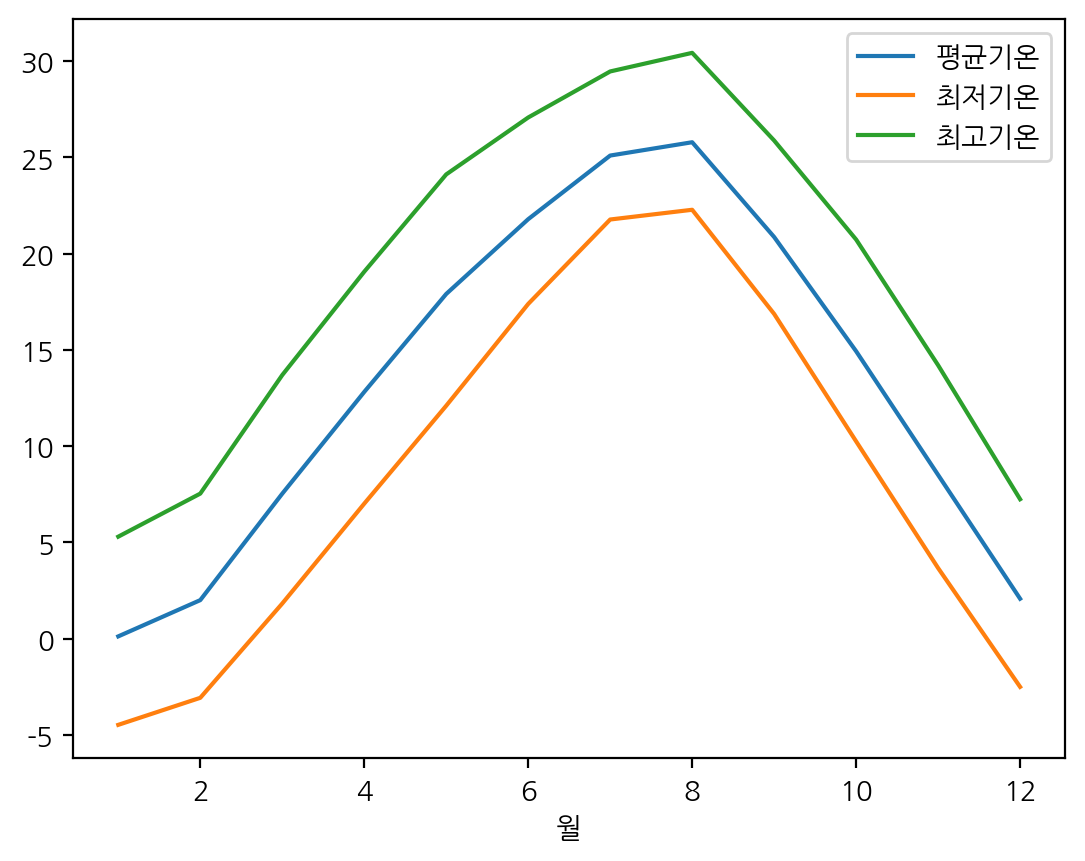

In [15]:
df.groupby(["월"])["평균기온","최저기온","최고기온"].mean().plot(kind="line")